In [ ]:
%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt
from keras.datasets import mnist
import numpy as np
import math

(train_X, train_y), (test_X, test_y) = mnist.load_data()

N = 60000 </br>
P = 28x28

In [ ]:
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


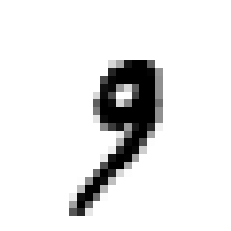

In [ ]:
some_digit = test_X[1000]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
          interpolation="nearest")
plt.axis("off")
plt.show()

In [ ]:
# Flatten
train_X = train_X.reshape(60000,784)
test_X = test_X.reshape(10000,784)

print('X_train: ' + str(train_X.shape))
print('X_test:  '  + str(test_X.shape))

X_train: (60000, 784)
X_test:  (10000, 784)


In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def MSE(Y, YH):
    return np.mean(np.square(Y - YH))

def GD(X,Y,t, l_r):
    total = 0
    total2= np.array([])
    print(len(X[0]))
    print(len(Y))
    print(len(t))
    X2=X.T
    for i in range(len(X[0])):
      
        
        print(len(Y))
        print(len(t))
        sub = np.subtract(Y,t) # this had the error was scalar instead of vector
        # total += np.dot(sub, X[i])
        print(X2[i].shape)
        print(X2[i])
        print(sub.shape)
        print(sub)
        total2 = np.append(total2, np.dot(sub, X2[i]))

    
    #print(total2)
    return l_r * (total2/len(X[0]))

def softmax(x):
    return 1/(1+np.exp(-x))

def cross_entropy(target,predicted):
        return -np.sum(np.dot(np.log(predicted).T, target))/60000

In [ ]:
def train(train_x, train_y, w_v, l_r = 0.001, epochs = 10000):
    print
    w = w_v
    for _ in range(10):
        y = []
        print(train_x.shape)
        for x_i in train_x:
            wx = np.dot(w, x_i) 
            y_hat = sigmoid(wx)
            y.append(y_hat)
            final_y = y            
        new_W = -GD(train_x,y,train_y, l_r)
        # print(new_W[:20])
        print(w.shape)
        print(new_W.shape)
        w += -new_W
        # np.testing.assert_array_equal(w,w_v)
        print(MSE(train_y, final_y))
print(train_X.shape)
train(train_X, train_y, np.random.uniform(size=784))

Streaming output truncated to the last 5000 lines.
[-5.  0. -4. ... -5. -6. -8.]
60000
60000
(60000,)
[ 0 75  0 ...  0  0  0]
(60000,)
[-5.  0. -4. ... -5. -6. -8.]
60000
60000
(60000,)
[  0 121   0 ...   0   0   0]
(60000,)
[-5.  0. -4. ... -5. -6. -8.]
60000
60000
(60000,)
[ 0 21  0 ...  0  0  0]
(60000,)
[-5.  0. -4. ... -5. -6. -8.]
60000
60000
(60000,)
[0 0 0 ... 0 0 0]
(60000,)
[-5.  0. -4. ... -5. -6. -8.]
60000
60000
(60000,)
[  0   0 198 ...   0   0   4]
(60000,)
[-5.  0. -4. ... -5. -6. -8.]
60000
60000
(60000,)
[  0 253 254 ...   0   0 147]
(60000,)
[-5.  0. -4. ... -5. -6. -8.]
60000
60000
(60000,)
[  0 243  56 ...   0   0 253]
(60000,)
[-5.  0. -4. ... -5. -6. -8.]
60000
60000
(60000,)
[  0  50   0 ...   0   0 240]
(60000,)
[-5.  0. -4. ... -5. -6. -8.]
60000
60000
(60000,)
[  0   0   0 ...   0   0 232]
(60000,)
[-5.  0. -4. ... -5. -6. -8.]
60000
60000
(60000,)
[ 0  0  0 ...  0  0 92]
(60000,)
[-5.  0. -4. ... -5. -6. -8.]
60000
60000
(60000,)
[0 0 0 ... 0 0 0]
(60000,)
[

KeyboardInterrupt: ignored

In [ ]:
def train(train_X, train_Y, epochs = 1000, l_r = 0.001):
    w = np.zeros((784,10))

    b = 0
    for i in range(epochs):
        #print tx.shape,w.shape
        y_pred = np.dot(train_X,w)
        soft = softmax(y_pred)
        loss = cross_entropy(train_Y,soft)
        print ("In {} iteration loss is {}".format(i,loss))

        sub =  np.subtract(soft.T,train_Y)
        dot = np.dot(train_X.T, sub.T)
        w += (-l_r * dot)

        b += (-np.around((np.sum(soft.T-train_Y)),4))
        print(b)
train(train_X,train_y)

In 0 iteration loss is 30.872313324018798
2372360.0
In 1 iteration loss is -0.0
4444720.0
In 2 iteration loss is -0.0
6517080.0
In 3 iteration loss is -0.0
8589440.0
In 4 iteration loss is -0.0
10661800.0
In 5 iteration loss is -0.0
12734160.0
In 6 iteration loss is -0.0
14806520.0
In 7 iteration loss is -0.0
16878880.0
In 8 iteration loss is -0.0
18951240.0
In 9 iteration loss is -0.0


KeyboardInterrupt: ignored